# Traffic Accident Project

#### CHAPTER ONE - DATA EXPLORATIONS and VISUALIZATIONS

In [47]:
#Import data
import pandas as pd
df = pd.read_csv('accident data.csv')

In [48]:
df.head(3)

,Report Number,Region,x_coordinate,y_coordinate,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,3AP0313,Ashanti,426340,428455,1,3/17/2017,815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,Ashanti,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,Ashanti,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32


#### A. Find the number of accidents per region

In [49]:
df.Region.value_counts()

Upper West       326
Upper East       253
Greater Accra    223
Western          219
Ashanti          217
Brong Ahafo      210
Volta            204
Northern         200
Central          194
Eastern          157
Name: Region, dtype: int64

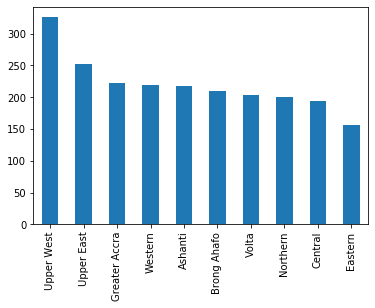

In [50]:
# We can also graph the data above
import matplotlib.pyplot as plt
%matplotlib inline 
df.Region.value_counts().plot.bar()

B. FIND THE PERCENTAGE CHANGE IN THE IN NUMBER OF ACCIDENTS FOR EACH REGION

C. FIND THE NUMBER OF ACCIDENTS PER MONTH

In [51]:
# Extract monoth from Date column
df['Accident Date2'] = pd.to_datetime(df['Accident Date'])

In [52]:
df['Accident Date2'].dtype

dtype('<M8[ns]')

In [53]:
df['Month of Accident'] = pd.DatetimeIndex(df['Accident Date2']).month

In [54]:
f = df['Month of Accident'].value_counts()
f

11    234
10    223
1     199
12    191
9     182
7     177
3     174
4     173
6     167
8     164
5     162
2     157
Name: Month of Accident, dtype: int64

In [55]:
df_month = pd.DataFrame({'Month':f.index.astype('str'), 'number of accidents':f.values})

In [56]:
df_month

,Month,number of accidents
0,11,234
1,10,223
2,1,199
3,12,191
4,9,182
5,7,177
6,3,174
7,4,173
8,6,167
9,8,164


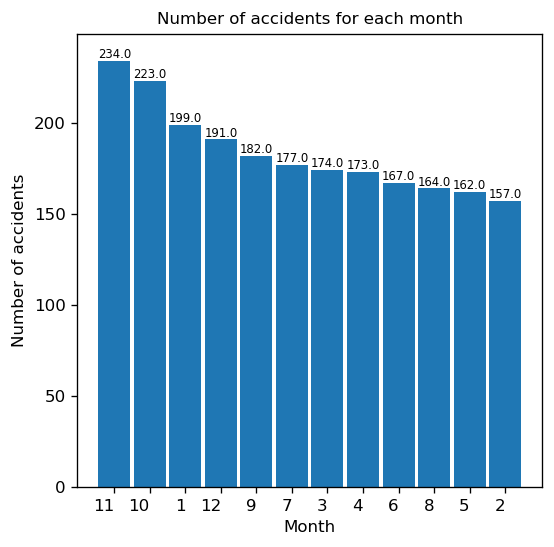

In [57]:
plt.figure(figsize = (5, 5), dpi = 120) # dpi is the number of pixels the figure comprises
plt.bar(df_month.Month, df_month['number of accidents'], width=.9)
for i, val in enumerate(df_month['number of accidents'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':50, 'size':7})
# Decoration
plt.gca().set_xticklabels(df_month['Month'], horizontalalignment= 'right')
plt.title("Number of accidents for each month", fontsize=10)
plt.ylabel('Number of accidents')
plt.xlabel('Month')
plt.ylim(0, (df_month['number of accidents'].max() + 15))
plt.show()

In [58]:
df_month.Month = df_month.Month.astype('int')
df_month.sort_values(by = ['Month'], inplace = True, ascending = True)

Text(0.5, 1.0, 'Number of accidents for each month')

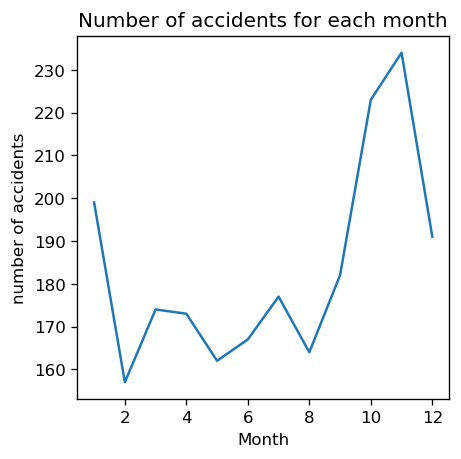

In [59]:
plt.figure(figsize = (4, 4), dpi = 120) # dpi is the number of pixels the figure comprises
plt.plot(df_month.Month, df_month['number of accidents'])
plt.xlabel('Month')
plt.ylabel('number of accidents')
plt.title('Number of accidents for each month')


D. FIND THE percentage change in the NUMBER OF ACCIDENTS PER MONTH

In [60]:
df['day of accident'] = pd.DatetimeIndex(df['Accident Date2']).day

E. NUMBER OF CRASHES FOR EACH HOUR

In [61]:
df['day of accident'] = df['day of accident'].astype('int')

In [62]:
gg = df['day of accident'].value_counts()
gg

3     94
2     90
1     88
25    87
9     86
15    82
11    82
24    80
27    79
23    77
20    76
22    76
4     75
8     75
17    74
12    72
5     72
10    71
18    70
28    70
19    69
16    68
13    67
21    64
6     62
29    60
30    56
26    52
7     50
14    44
31    35
Name: day of accident, dtype: int64

In [63]:
df_day = pd.DataFrame({'Day':gg.index.astype('int'), 'number of accidents':gg.values})

Text(0, 0.5, 'Number of accidents')

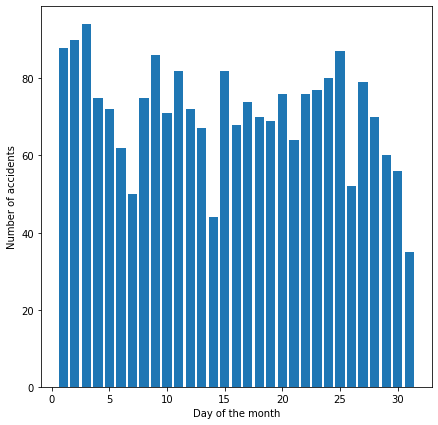

In [64]:
plt.figure(figsize = (7,7))
plt.bar(df_day['Day'], df_day['number of accidents'])
#add some decorations
plt.xlabel('Day of the month')
plt.ylabel('Number of accidents')


The plot above might be useful for examining the number of accidents at the end of the month and the at the beginning of the month. 

Now you need to assign days to the dates and examine the number of accidents for each day, for example monday, tuesday, wednesday, etc. 

In [65]:
df['Day of Week'] = df['Accident Date2'].apply(lambda time: time.dayofweek)

In [66]:
yy = df['Day of Week'].value_counts()

In [67]:
yy

4    367
5    335
2    332
3    323
0    297
1    293
6    256
Name: Day of Week, dtype: int64

In [68]:
df_yy = pd.DataFrame({'Day':yy.index, 'number of accidents':yy.values})

In [69]:
df_yy.sort_values(by=['Day'], inplace = True, ascending = True)

Text(0.5, 1.0, 'number of accidents per day')

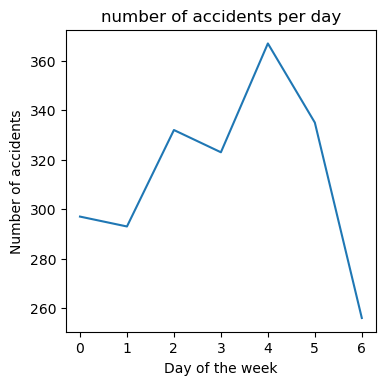

In [70]:
plt.figure(figsize = (4,4), dpi = 100)
plt.plot(df_yy['Day'], df_yy['number of accidents'])
plt.xlabel('Day of the week')
plt.ylabel('Number of accidents')
plt.title('number of accidents per day')

PLOTTING THE NUMBER OF ACCIDENTTS PER 

In [78]:
df['Time2'] = df['Time (24hr)']/100

In [80]:
uu = df['Time2'].value_counts()

In [81]:
uu

17.00    34
18.00    29
16.00    29
19.00    22
16.30    21
         ..
23.28     1
13.12     1
20.05     1
6.33      1
22.19     1
Name: Time2, Length: 633, dtype: int64

In [84]:
df_uu = pd.DataFrame({'Hours':uu.index, 'number of accidents':uu.values})
df_uu.Hours = df_uu.Hours.round()
#

In [85]:
df_uu.sort_values(by=['Hours'], inplace = True, ascending = True)

Text(0.5, 1.0, 'number of accidents per Time')

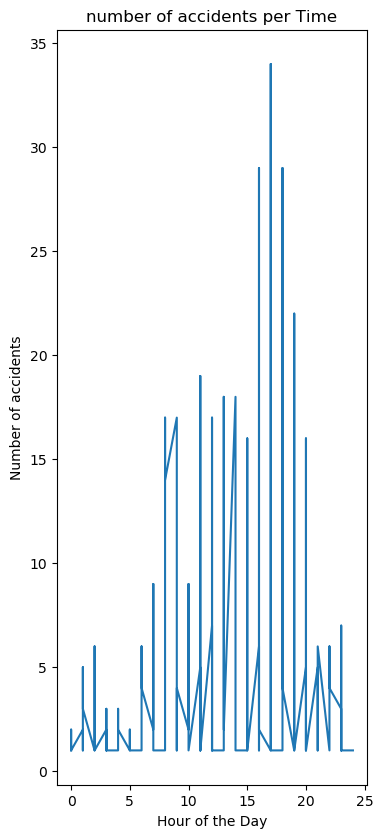

In [87]:
plt.figure(figsize = (10,4), dpi = 100)
plt.plot(df_uu['Hours'], df_uu['number of accidents'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of accidents')
plt.title('number of accidents per Time')